<a href="https://colab.research.google.com/github/ThePina/Machine-learning-final-project/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import io
import numpy as np

import csv
url = 'https://sinca.mma.gob.cl/cgi-bin/APUB-MMA/apub.tsindico2.cgi?outtype=xcl&macro=./RVII/709/Cal/PM25//PM25.horario.horario.ic&from=120707&to=211130&path=/usr/airviro/data/CONAMA/&lang=esp&rsrc=&macropath='
data = requests.get(url)
lines = data.text.splitlines()


In [ ]:
#quitar columna y fila
reader = csv.reader(lines,delimiter=';')
df = pd.DataFrame(reader)
df.drop([5], axis=1,inplace=True)
df.drop([0], axis=0,inplace=True)
df.columns = ["FECHA (YYMMDD)",	"HORA (HHMM)"	,"Registros validados"	,"Registros preliminares"	,"Registros no validados"]
df.reset_index()
df

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados
1,120707,0100,,,
2,120707,0200,,,
3,120707,0300,,,
4,120707,0400,,,
5,120707,0500,,,
...,...,...,...,...,...
82411,211130,1900,,3,
82412,211130,2000,,7,
82413,211130,2100,,7,
82414,211130,2200,,11,


In [ ]:
#remplazar valores sin nada con
df=df.replace('',0.0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82415 entries, 1 to 82415
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FECHA (YYMMDD)          82415 non-null  object
 1   HORA (HHMM)             82415 non-null  object
 2   Registros validados     82415 non-null  object
 3   Registros preliminares  82415 non-null  object
 4   Registros no validados  82415 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
#df['FECHA (YYMMDD)']=df['FECHA (YYMMDD)'].astype(int)
#df['HORA (HHMM)']=df['HORA (HHMM)'].astype(int)

df['Registros validados']=df['Registros validados'].str.replace(',','.').astype(float)
df['Registros preliminares']=df['Registros preliminares'].str.replace(',','.').astype(float)
df['Registros no validados']=df['Registros no validados'].str.replace(',','.').astype(float)

In [ ]:
df=df.replace(np.nan,0.0)
df

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados
1,120707,0100,0.0,0.0,0.0
2,120707,0200,0.0,0.0,0.0
3,120707,0300,0.0,0.0,0.0
4,120707,0400,0.0,0.0,0.0
5,120707,0500,0.0,0.0,0.0
...,...,...,...,...,...
82411,211130,1900,0.0,3.0,0.0
82412,211130,2000,0.0,7.0,0.0
82413,211130,2100,0.0,7.0,0.0
82414,211130,2200,0.0,11.0,0.0


#Union de datos

In [ ]:
df2=pd.DataFrame()

###Fecha

In [ ]:
df2['ds'] =df['FECHA (YYMMDD)']+df['HORA (HHMM)']
df2['ds'] = pd.to_datetime(df2['ds'], format="%y%m%d%H%M")

###mediciones

In [ ]:

#df2['date'] =df['FECHA (YYMMDD)']+df['HORA (HHMM)']
df2['y'] = df['Registros validados']+df['Registros preliminares']+df['Registros no validados']
#df2.columns = ["Fecha" ,"datos"]


In [ ]:
df2 = df2[df2.y != 0.0]
df2.reset_index()
df2

,ds,y
16,2012-07-07 16:00:00,33.7100
17,2012-07-07 17:00:00,53.9500
18,2012-07-07 18:00:00,96.3999
19,2012-07-07 19:00:00,67.4298
20,2012-07-07 20:00:00,163.2000
...,...,...
82411,2021-11-30 19:00:00,3.0000
82412,2021-11-30 20:00:00,7.0000
82413,2021-11-30 21:00:00,7.0000
82414,2021-11-30 22:00:00,11.0000


##Grafico de tiempo

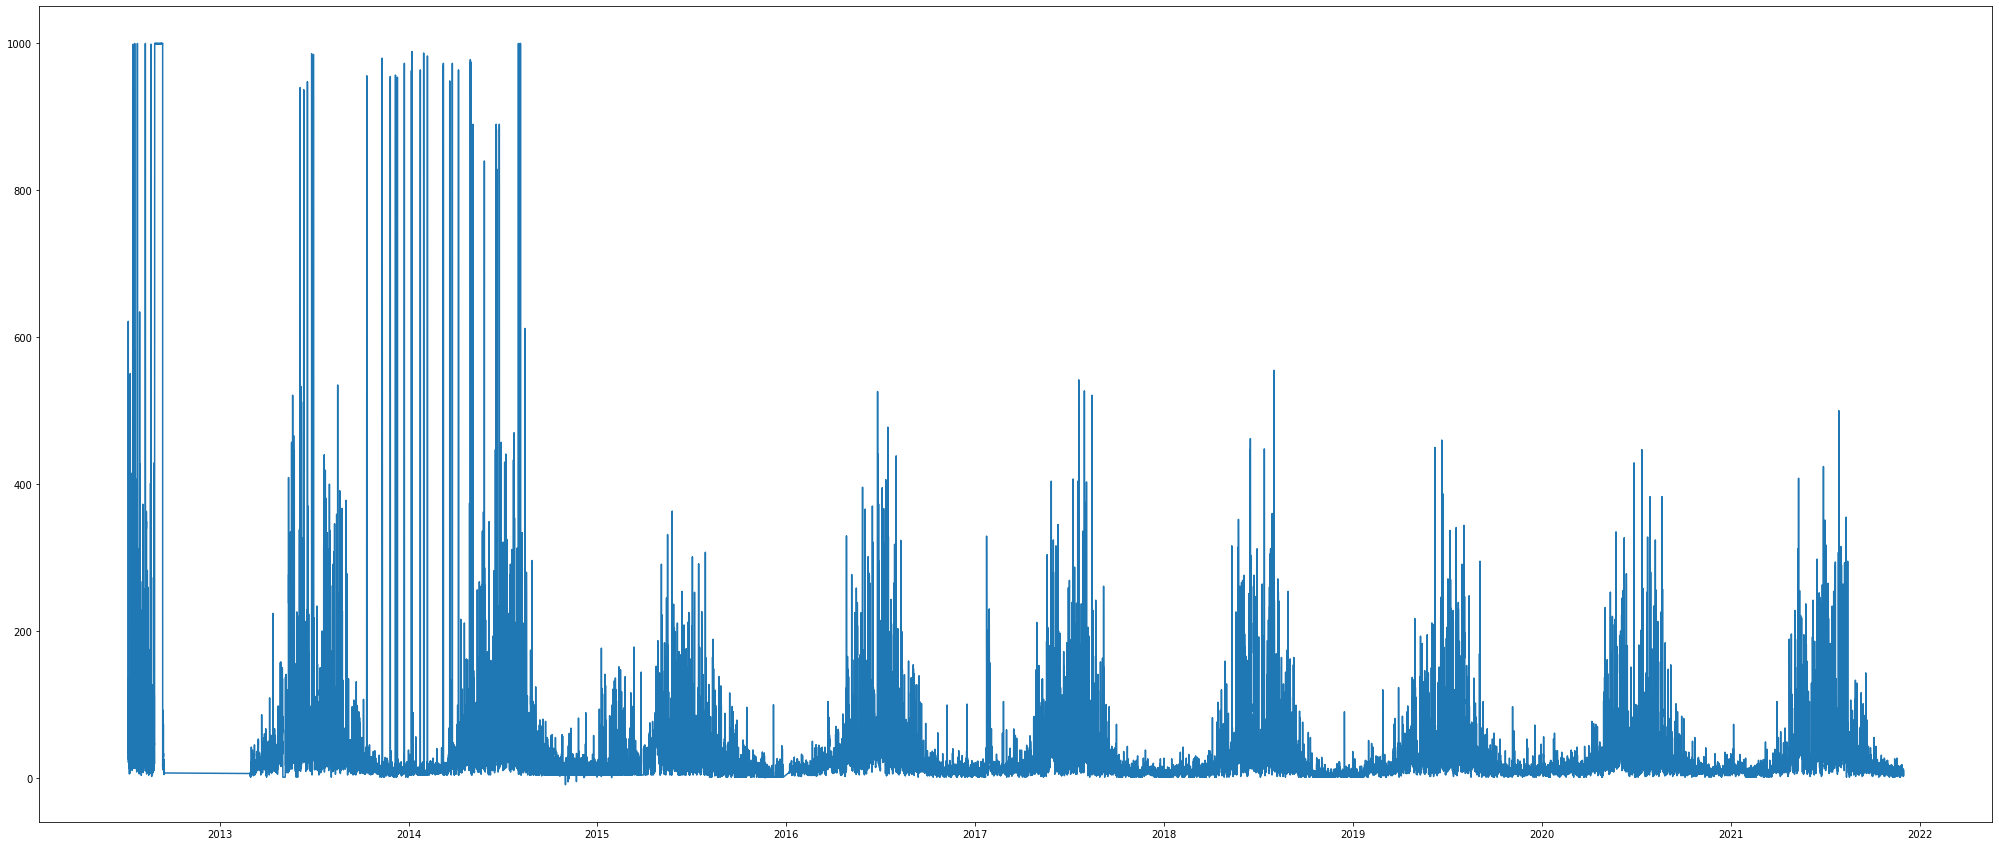

In [ ]:
import matplotlib.pyplot as plt
x = np.array(df2['ds'])
y = np.array(df2['y'])
plt.figure(figsize=(35, 15))

plt.plot(x,y)

prophet

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.4, shuffle=False)
train

,ds,y
16,2012-07-07 16:00:00,33.7100
17,2012-07-07 17:00:00,53.9500
18,2012-07-07 18:00:00,96.3999
19,2012-07-07 19:00:00,67.4298
20,2012-07-07 20:00:00,163.2000
...,...,...
51362,2018-05-17 02:00:00,28.0000
51363,2018-05-17 03:00:00,31.0000
51364,2018-05-17 04:00:00,31.0000
51365,2018-05-17 05:00:00,30.0000


In [ ]:
from fbprophet import Prophet

m = Prophet()
m.fit(train)

In [ ]:
future = m.make_future_dataframe(periods=1095)
future.tail()


,ds
47269,2021-05-12 06:00:00
47270,2021-05-13 06:00:00
47271,2021-05-14 06:00:00
47272,2021-05-15 06:00:00
47273,2021-05-16 06:00:00


In [ ]:
forecast = m.predict(future)

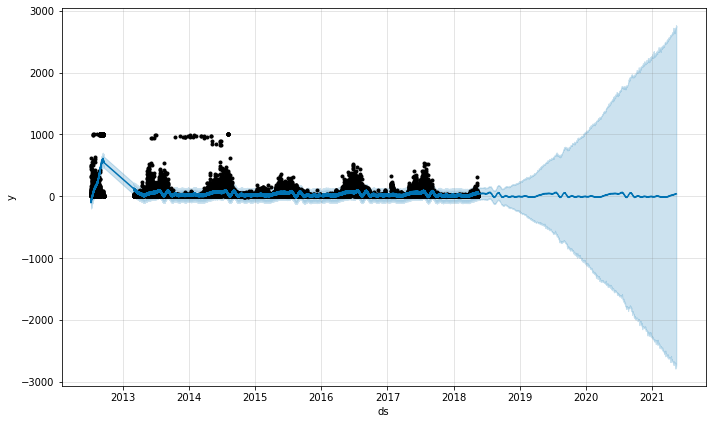

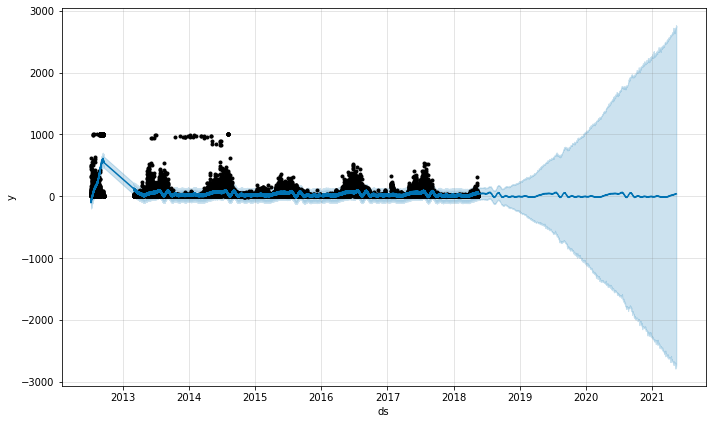

In [ ]:
m.plot(forecast)
